In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

68
68
840
2019-07-27T00:00
     latitude  longitude  altitude       hourly.time  hourly.temperature_2m  \
840  40.03515  -7.804169     563.0  2019-07-27T00:00                   14.3   
841  40.03515  -7.804169     563.0  2019-07-27T01:00                   13.9   
842  40.03515  -7.804169     563.0  2019-07-27T02:00                   13.6   
843  40.03515  -7.804169     563.0  2019-07-27T03:00                   13.5   
844  40.03515  -7.804169     563.0  2019-07-27T04:00                   13.4   
845  40.03515  -7.804169     563.0  2019-07-27T05:00                   14.0   
846  40.03515  -7.804169     563.0  2019-07-27T06:00                   14.8   
847  40.03515  -7.804169     563.0  2019-07-27T07:00                   15.8   
848  40.03515  -7.804169     563.0  2019-07-27T08:00                   16.2   
849  40.03515  -7.804169     563.0  2019-07-27T09:00                   16.5   
850  40.03515  -7.804169     563.0  2019-07-27T10:00                   17.3   
851  40.03515  -7.804169 

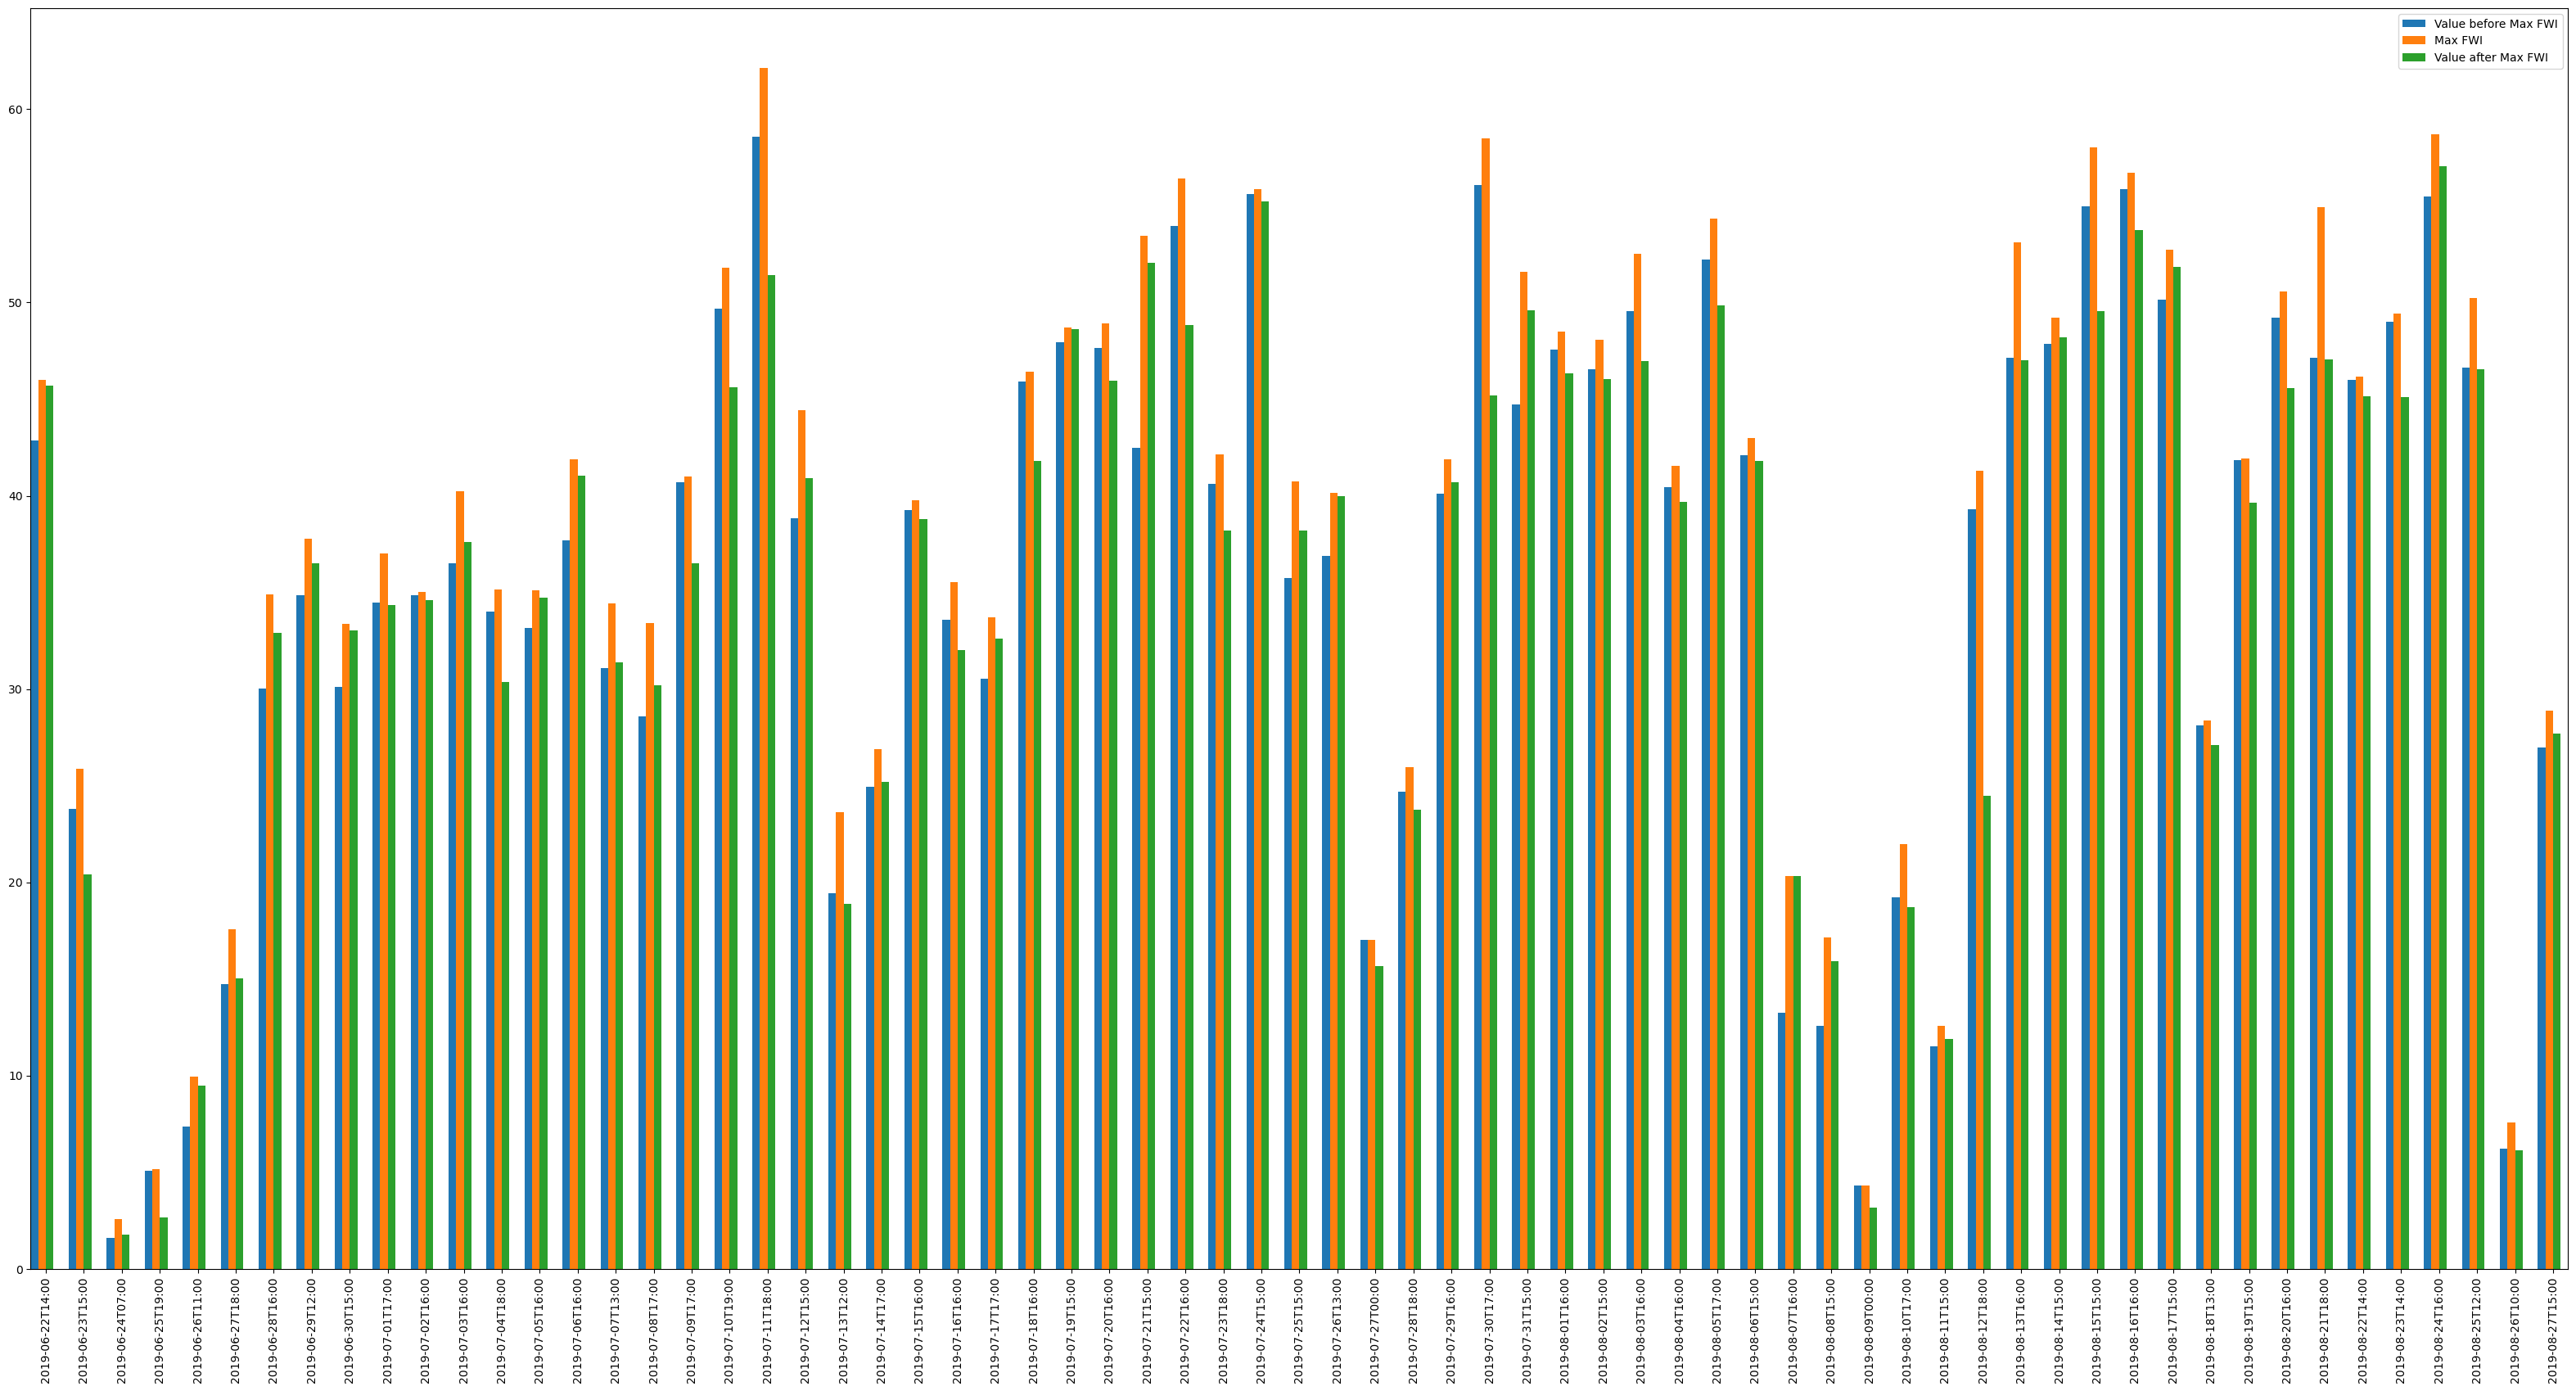

In [8]:
pdtotal = pd.read_csv('Samples/2019/2019byHourFWIXFFMCFireHour.csv')


#fwix,ffmc,dmc,dc,isi,bui

var = "FWI"
var_field = "fwix"

chunk_size = 24
num_chunks = len(pdtotal) // chunk_size + 1
print(num_chunks)

bar_width = 0.25
index = np.arange(num_chunks)

max_times = []
max_fwix = []
before_fwixs = []
after_fwixs = []

print(num_chunks)

for i in range(num_chunks):
    chunk = pdtotal[i*chunk_size:(i+1)*chunk_size]
    if chunk.empty:
        continue
    
    max_index = chunk[f'{var_field}'].idxmax()
    max_time = chunk.loc[max_index, 'hourly.time']
    max_fwi = chunk.loc[max_index, f'{var_field}']
    max_times.append(max_time)
    max_fwix.append(max_fwi)

    if max_index-1 in chunk.index:
        before_time = chunk.loc[max_index-1, 'hourly.time']
        before_fwix = chunk.loc[max_index-1, f'{var_field}']
        before_fwixs.append(before_fwix)
    else:
        print(max_index)
        print(max_time)
        print(chunk)
        before_time = chunk.loc[max_index, 'hourly.time']
        before_fwix = chunk.loc[max_index, f'{var_field}']
        before_fwixs.append(before_fwix)
        #before_fwixs.append(None)

    if max_index+1 in chunk.index:
        after_time = chunk.loc[max_index+1, 'hourly.time']
        after_fwix = chunk.loc[max_index+1, f'{var_field}']
        after_fwixs.append(after_fwix)
    else:
        after_time = chunk.loc[max_index, 'hourly.time']
        after_fwix = chunk.loc[max_index, f'{var_field}']
        after_fwixs.append(after_fwix)
        #after_fwixs.append(None)

num_groups = len(max_fwix)

bar_width = 0.2

group_positions = np.arange(num_groups)

plt.figure(figsize=(40,20))


plt.bar(group_positions - 1.5*bar_width, before_fwixs, bar_width, label=f'Value before Max {var}')
plt.bar(group_positions - 0.5*bar_width, max_fwix, bar_width, label=f'Max {var}')
plt.bar(group_positions + 0.5*bar_width, after_fwixs, bar_width, label=f'Value after Max {var}')

plt.xticks(group_positions, labels=max_times, rotation=90)
plt.xlim(group_positions[0] - 2*bar_width, group_positions[-1] + 2*bar_width)

plt.savefig(f'{var}_max_before_after.png', dpi=300, bbox_inches='tight')

plt.legend()

plt.show()

68
68


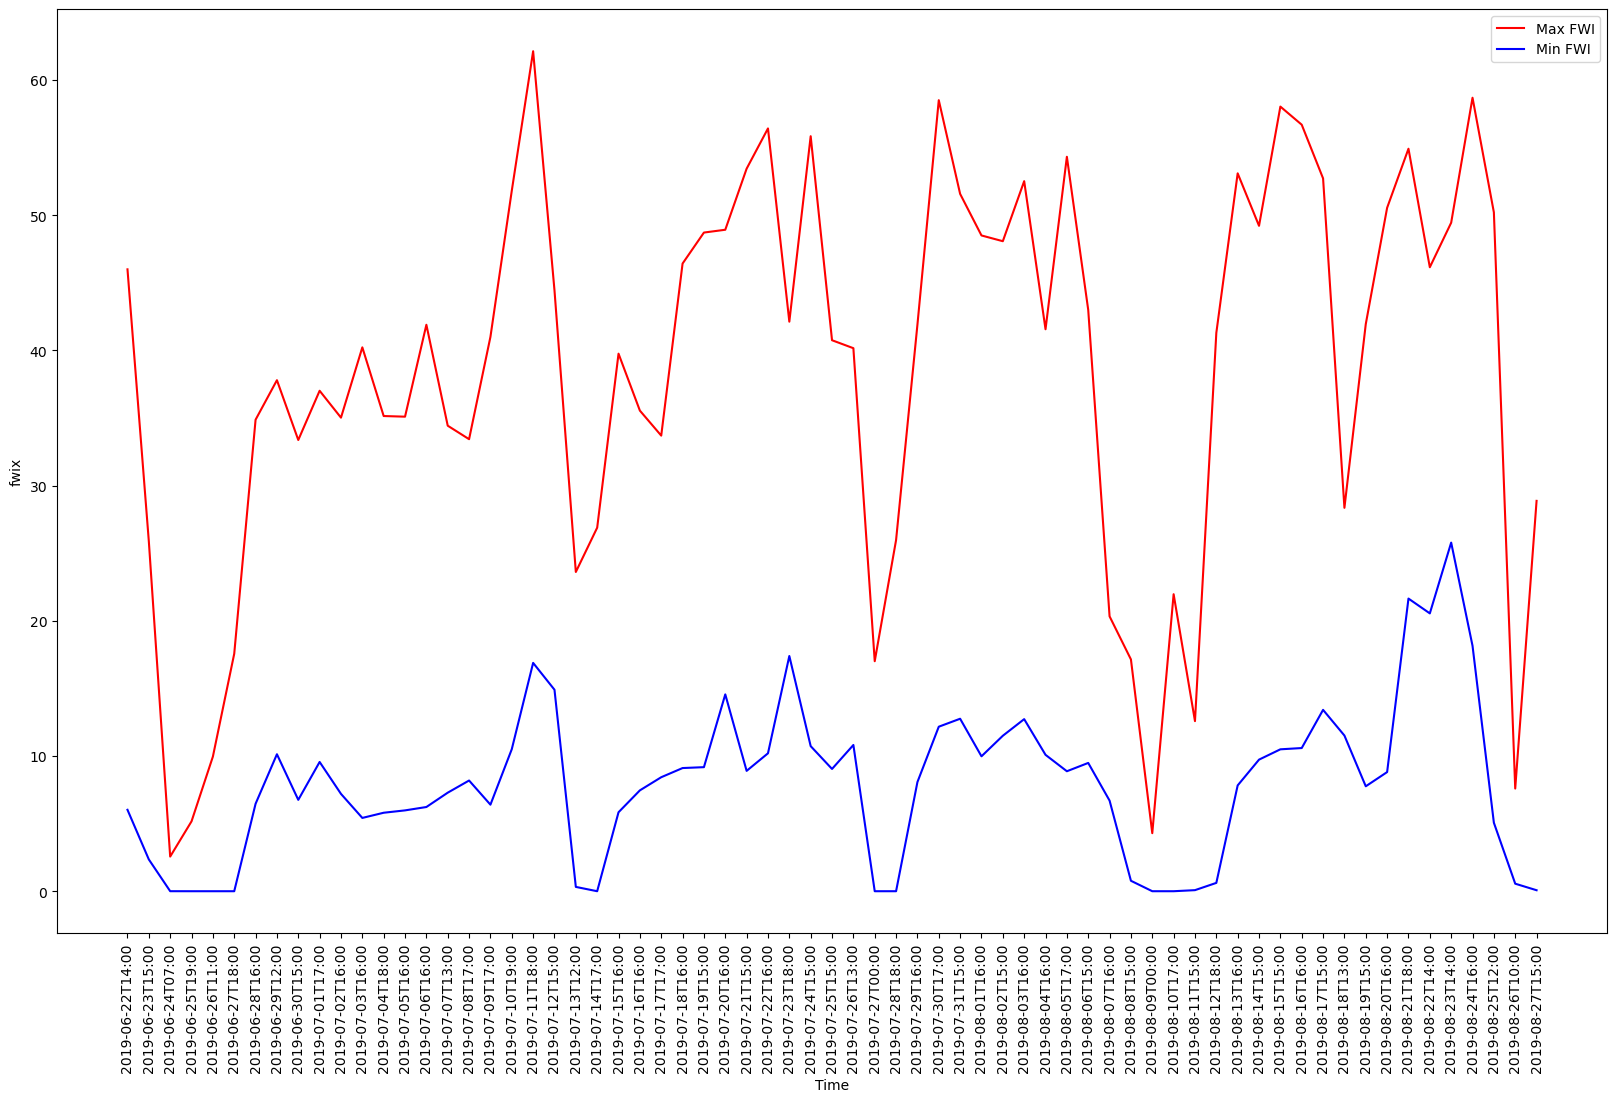

In [9]:
pdtotal = pd.read_csv('Samples/2019/2019byHourFWIXFFMCFireHour.csv')


#fwix,ffmc,dmc,dc,isi,bui

var = "FWI"
var_field = "fwix"

chunk_size = 24
num_chunks = len(pdtotal) // chunk_size + 1
print(num_chunks)

bar_width = 0.25
index = np.arange(num_chunks)

max_times = []
max_fwix = []
min_fwix = []

print(num_chunks)

for i in range(num_chunks):
    chunk = pdtotal[i*chunk_size:(i+1)*chunk_size]
    if chunk.empty:
        continue
    
    min_index = chunk[f'{var_field}'].idxmin()
    max_index = chunk[f'{var_field}'].idxmax()

    max_time = chunk.loc[max_index, 'hourly.time']
    max_fwi = chunk.loc[max_index, f'{var_field}']
    max_times.append(max_time)
    max_fwix.append(max_fwi)
    min_fwi = chunk.loc[min_index, f'{var_field}']
    min_fwix.append(min_fwi)



plt.figure(figsize=(20,12))
plt.plot(max_times, max_fwix, label=f'Max {var}', color='red')
plt.plot(max_times, min_fwix, label=f'Min {var}', color='blue')
plt.xlabel('Time')
plt.xticks(max_times, rotation=90)
plt.ylabel(f'{var_field}')
plt.legend()
plt.savefig(f'{var}_maxMin.png', dpi=300, bbox_inches='tight')
plt.show()

68
68
67 67


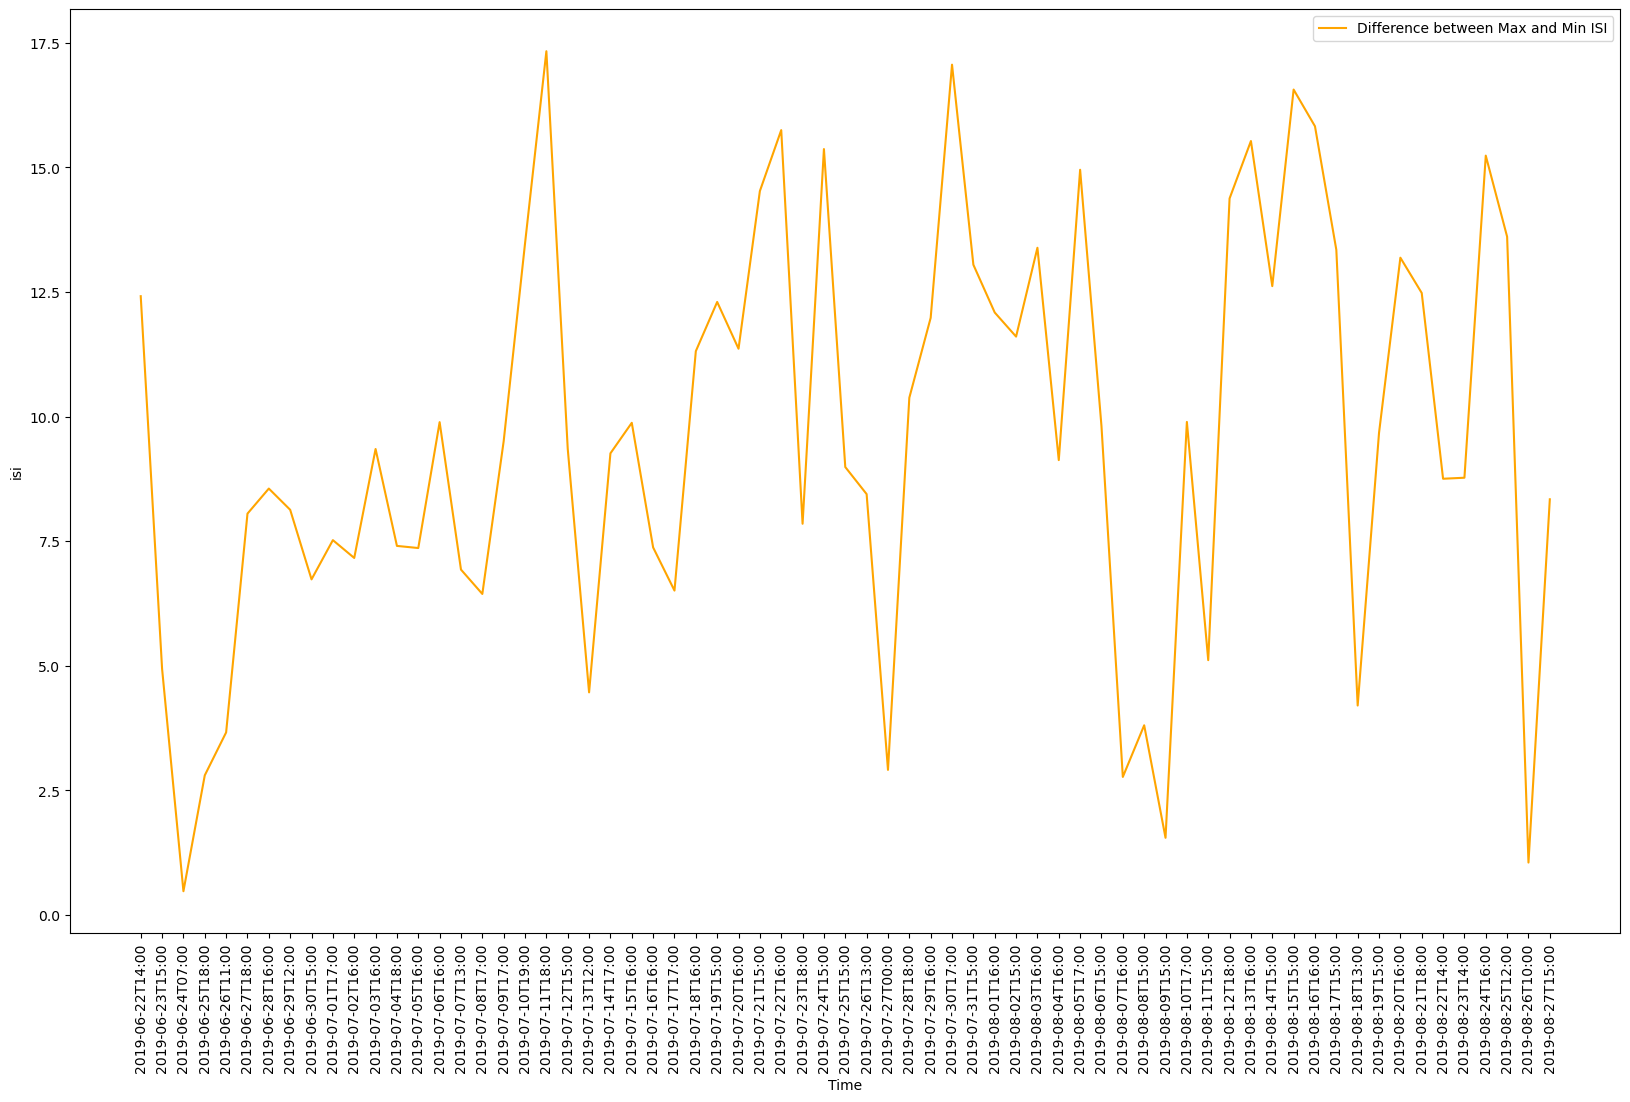

In [14]:
pdtotal = pd.read_csv('Samples/2019/2019byHourFWIXFFMCFireHour.csv')


#fwix,ffmc,dmc,dc,isi,bui

var = "ISI"
var_field = "isi"

chunk_size = 24
num_chunks = len(pdtotal) // chunk_size + 1
print(num_chunks)

bar_width = 0.25
index = np.arange(num_chunks)

max_times = []
diffs = []

print(num_chunks)

for i in range(num_chunks):
    chunk = pdtotal[i*chunk_size:(i+1)*chunk_size]
    if chunk.empty:
        continue
    
    min_index = chunk[f'{var_field}'].idxmin()
    max_index = chunk[f'{var_field}'].idxmax()
    

    max_time = chunk.loc[max_index, 'hourly.time']
    max_fwi = chunk.loc[max_index, f'{var_field}']
    min_fwi = chunk.loc[min_index, f'{var_field}']

    max_times.append(max_time)
    diff = max_fwi - min_fwi
    diffs.append(diff)

    

print(len(max_times), len(diffs))

plt.figure(figsize=(20,12))
plt.plot(max_times, diffs, label=f'Difference between Max and Min {var}', color='orange')
plt.xlabel('Time')
plt.xticks(max_times, rotation=90)
plt.ylabel(f'{var_field}')
plt.legend()
plt.savefig(f'{var}_DIFFmaxMin_graph.png', dpi=300, bbox_inches='tight')
plt.show()

68
68
67 67


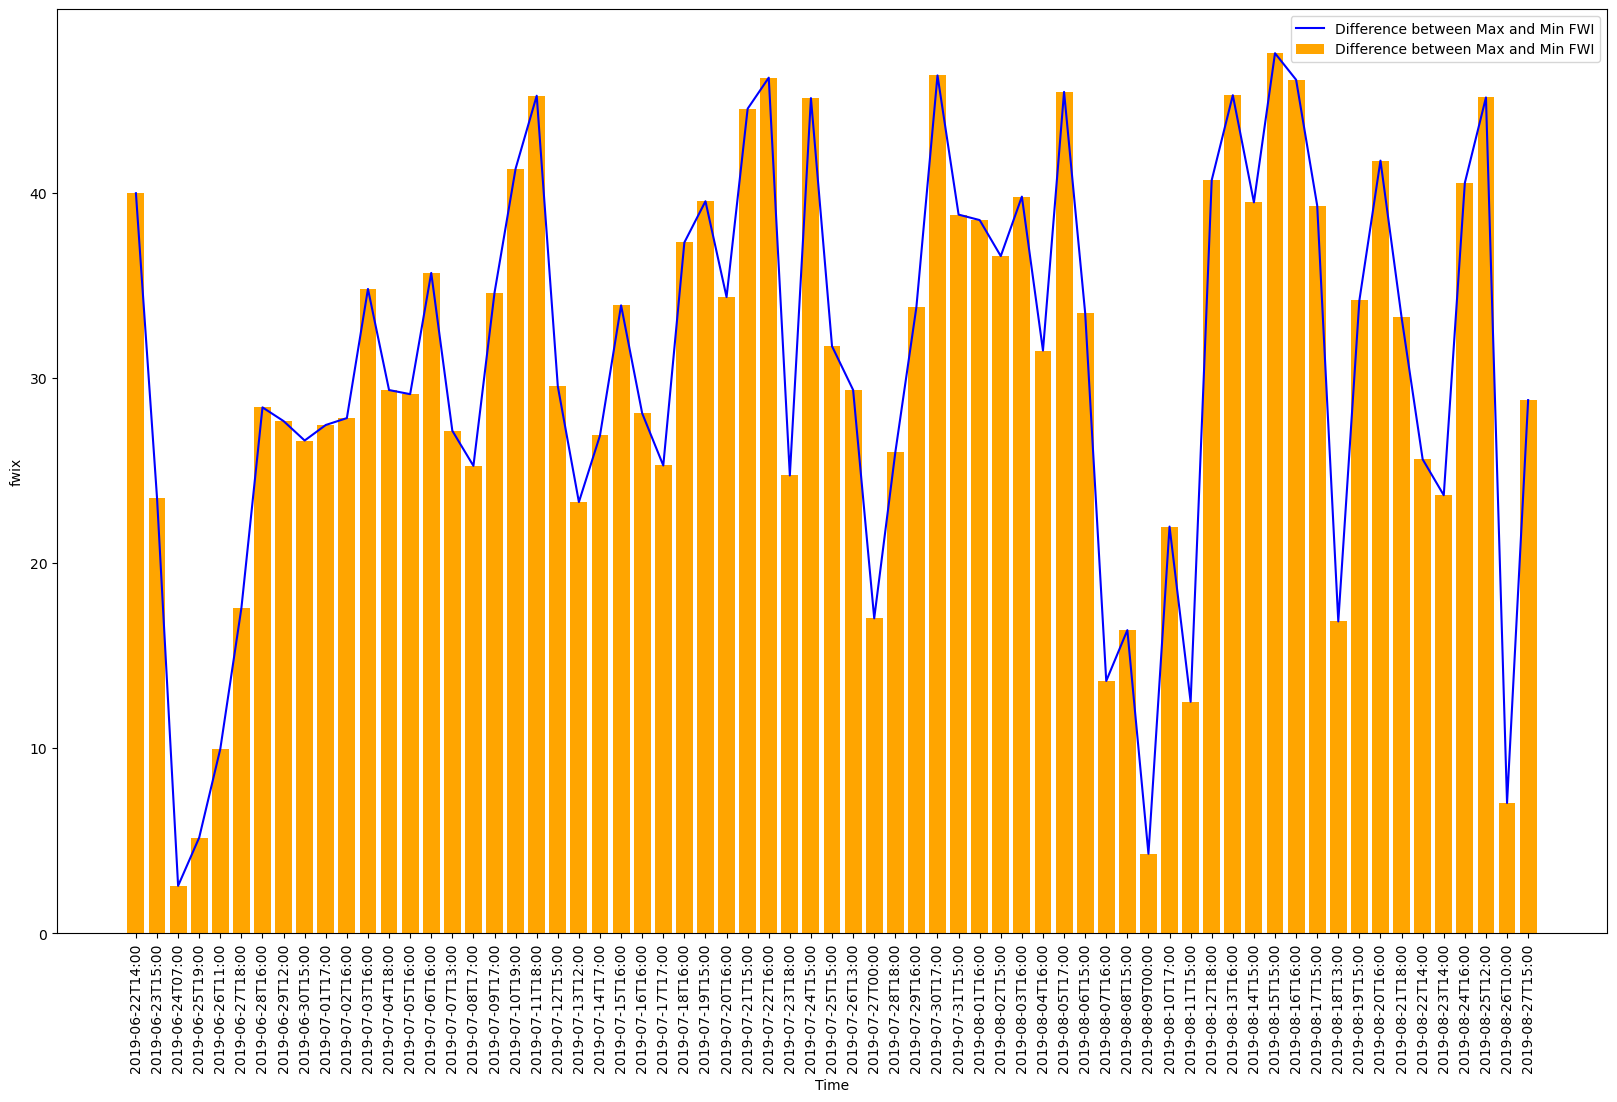

In [19]:
pdtotal = pd.read_csv('Samples/2019/2019byHourFWIXFFMCFireHour.csv')


#fwix,ffmc,dmc,dc,isi,bui

var = "FWI"
var_field = "fwix"

chunk_size = 24
num_chunks = len(pdtotal) // chunk_size + 1
print(num_chunks)

bar_width = 0.25
index = np.arange(num_chunks)

max_times = []
diffs = []

print(num_chunks)

for i in range(num_chunks):
    chunk = pdtotal[i*chunk_size:(i+1)*chunk_size]
    if chunk.empty:
        continue
    
    min_index = chunk[f'{var_field}'].idxmin()
    max_index = chunk[f'{var_field}'].idxmax()
    

    max_time = chunk.loc[max_index, 'hourly.time']
    max_fwi = chunk.loc[max_index, f'{var_field}']
    min_fwi = chunk.loc[min_index, f'{var_field}']

    max_times.append(max_time)
    diff = max_fwi - min_fwi
    diffs.append(diff)

    

print(len(max_times), len(diffs))

plt.figure(figsize=(20,12))
plt.bar(max_times, diffs, label=f'Difference between Max and Min {var}', color='orange')
plt.plot(max_times, diffs, label=f'Difference between Max and Min {var}', color='blue')
plt.xlabel('Time')
plt.xticks(max_times, rotation=90)
plt.ylabel(f'{var_field}')
plt.legend()
plt.savefig(f'{var}_DIFFmaxMin.png', dpi=300, bbox_inches='tight')
plt.show()